In [ ]:
!pip install chardet

In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [46]:
# Visualiser les premières lignes
df.head()

# Voir les informations des colonnes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8660 entries, 0 to 8659
Data columns (total 13 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Periode                                  8660 non-null   object 
 1   ID client                                1666 non-null   object 
 2   Nombre de retraits effectues par carte   1666 non-null   float64
 3   Nombre d'operations carte                1653 non-null   float64
 4   Nombre d'operations Hors carte           1663 non-null   float64
 5   Total mouvement d'affaires               1666 non-null   float64
 6   Encours crdit immo                       1666 non-null   object 
 7   Encours Crdit consommation amortisable   1666 non-null   object 
 8   Encours Crdit consommation renouvelable  1666 non-null   object 
 9   Encours Compte Epargne                   1564 non-null   float64
 10  Encours Compte Epargne terme             1665 no

In [47]:
# Vérifier les valeurs manquantes
df.isnull().sum()

# Par exemple, supprimer les lignes avec des valeurs manquantes
df = df.dropna()




In [48]:
# Supposons que 'Offre attribuée' est la variable cible
X = df.drop(['Offre attribuée'], axis=1)  # Variables explicatives
y = df['Offre attribuée']  # Cible

# Convertir les données catégoriques si nécessaire
X = pd.get_dummies(X)


In [12]:
# Afficher les colonnes du DataFrame fusionné
print(df_merged.columns)



Index(['Période_x', 'ID client', 'AGE', 'situation familiale',
       'date entrée en relation LCL', 'capacité juridique',
       'régime matrimonial', 'Nombre d'enfants', 'Age enfant 1',
       'Age enfant 2', 'Age enfant 3', 'Age enfant 4', 'Age enfant 5', 'CSP',
       'Période_y', 'Nombre de retraits effectués par carte',
       'Nombre d'opérations carte', 'Nombre d'opérations Hors carte',
       'Total mouvement d'affaires', 'Encours crédit immo',
       'Encours Crédit consommation amortisable',
       'Encours Crédit consommation renouvelable', 'Encours Compte Epargne',
       'Encours Compte Epargne à terme', 'montant encours AV', 'ï»¿PÃ©riode',
       'ID contrat', 'libellÃ© contrat'],
      dtype='object')


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [51]:
# Créer le modèle
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entraîner le modèle
clf.fit(X_train, y_train)

# Faire des prédictions
y_pred = clf.predict(X_test)

# Calculer la précision
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle: {accuracy * 100:.2f}%")



Précision du modèle: 98.71%


In [52]:
# Rapport de classification
print(classification_report(y_test, y_pred))



                                        precision    recall  f1-score   support

                                Credit       0.98      1.00      0.99       202
            Nouvelle Carte (Etudiants)       1.00      0.99      0.99       216
Nouvelle Epargne (Plus ou Moins ecolo)       1.00      0.94      0.97        48

                              accuracy                           0.99       466
                             macro avg       0.99      0.97      0.98       466
                          weighted avg       0.99      0.99      0.99       466



In [53]:
from sklearn.model_selection import GridSearchCV

# Définir une grille d'hyperparamètres à tester
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Meilleur modèle
print(grid_search.best_params_)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
{'max_depth': None, 'n_estimators': 200}


In [54]:
import joblib

# Sauvegarder le modèle entraîné
joblib.dump(clf, 'modele_random_forest.pkl')





['modele_random_forest.pkl']

In [58]:
# Charger le modèle
model = joblib.load('modele_random_forest.pkl')

# Faire de nouvelles prédictions
y_new_pred = model.predict(X_test)

print (y_new_pred)



['Credit' 'Nouvelle Carte (Etudiants)' 'Credit' 'Credit' 'Credit' 'Credit'
 'Nouvelle Carte (Etudiants)' 'Credit' 'Credit' 'Credit'
 'Nouvelle Carte (Etudiants)' 'Nouvelle Carte (Etudiants)' 'Credit'
 'Nouvelle Carte (Etudiants)' 'Credit' 'Credit'
 'Nouvelle Carte (Etudiants)' 'Nouvelle Carte (Etudiants)'
 'Nouvelle Carte (Etudiants)' 'Nouvelle Carte (Etudiants)'
 'Nouvelle Carte (Etudiants)' 'Nouvelle Carte (Etudiants)' 'Credit'
 'Nouvelle Carte (Etudiants)' 'Nouvelle Carte (Etudiants)' 'Credit'
 'Credit' 'Credit' 'Nouvelle Carte (Etudiants)' 'Credit'
 'Nouvelle Epargne (Plus ou Moins ecolo)'
 'Nouvelle Epargne (Plus ou Moins ecolo)' 'Credit'
 'Nouvelle Carte (Etudiants)' 'Nouvelle Carte (Etudiants)' 'Credit'
 'Credit' 'Nouvelle Epargne (Plus ou Moins ecolo)'
 'Nouvelle Carte (Etudiants)' 'Nouvelle Carte (Etudiants)'
 'Nouvelle Carte (Etudiants)' 'Credit' 'Credit' 'Credit'
 'Nouvelle Epargne (Plus ou Moins ecolo)' 'Nouvelle Carte (Etudiants)'
 'Credit' 'Credit' 'Nouvelle Carte (Etudia

In [68]:
def predire_offre(client_id):
    # Filtrer les caractéristiques du client
    client_data = df[df['ID client'] == client_id].drop(['Offre attribuée', 'ID client'], axis=1)

    # Convertir les variables catégoriques en numériques
    client_data = pd.get_dummies(client_data)

    # Assurez-vous que les colonnes du client correspondent au jeu d'entraînement
    # Utilisez X (le DataFrame avant la normalisation) pour reindexer les colonnes
    client_data = client_data.reindex(columns=X.columns, fill_value=0)

    # Appliquer la normalisation après avoir aligné les colonnes
    client_data = scaler.transform(client_data)

    # Faire la prédiction
    predicted_offer = clf.predict(client_data)

    # Retourner le résultat
    return predicted_offer[0]

# Appel de la fonction pour un ID client spécifique
offre_predite = predire_offre('00-07-F3-D5')
print(f"L'offre prédite est : {offre_predite}")


L'offre prédite est : Credit


In [62]:
from sklearn.metrics import accuracy_score, classification_report

# Prédictions sur l'ensemble de test
y_test_pred = clf.predict(X_test)

# Calculer la précision
precision = accuracy_score(y_test, y_test_pred)
print(f"La précision du modèle est : {precision * 100:.2f}%")

# Afficher un rapport de classification détaillé
print("Rapport de classification :")
print(classification_report(y_test, y_test_pred))


La précision du modèle est : 98.71%
Rapport de classification :
                                        precision    recall  f1-score   support

                                Credit       0.98      1.00      0.99       202
            Nouvelle Carte (Etudiants)       1.00      0.99      0.99       216
Nouvelle Epargne (Plus ou Moins ecolo)       1.00      0.94      0.97        48

                              accuracy                           0.99       466
                             macro avg       0.99      0.97      0.98       466
                          weighted avg       0.99      0.99      0.99       466



In [64]:
# Avant de normaliser les données, conserver les IDs des clients dans l'ensemble de test
X_train_original, X_test_original, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Conserver l'index des clients avant la normalisation
client_ids_test = df.loc[X_test_original.index, 'ID client']

# Appliquer la normalisation après avoir divisé les données
X_train = scaler.fit_transform(X_train_original)
X_test = scaler.transform(X_test_original)

# Faire les prédictions sur l'ensemble de test
y_test_pred = clf.predict(X_test)

# Créer un DataFrame avec les IDs des clients, les vraies valeurs et les prédictions
resultats = pd.DataFrame({
    'ID client': client_ids_test,
    'Offre réelle': y_test,
    'Offre prédite': y_test_pred
})

# Afficher les résultats
print(resultats)

# Afficher la précision du modèle
precision = accuracy_score(y_test, y_test_pred)
print(f"La précision du modèle est : {precision * 100:.2f}%")


        ID client                            Offre réelle  \
1633  5D-B8-32-5E                                  Credit   
288   11-D1-DF-63              Nouvelle Carte (Etudiants)   
381   16-67-52-A8  Nouvelle Epargne (Plus ou Moins ecolo)   
382   16-71-A7-3A  Nouvelle Epargne (Plus ou Moins ecolo)   
1125  41-7C-AB-FB                                  Credit   
...           ...                                     ...   
433   19-A4-E7-CC                                  Credit   
461   1A-F0-47-0F                                  Credit   
402   17-4F-56-42                                  Credit   
57    03-2E-4C-06  Nouvelle Epargne (Plus ou Moins ecolo)   
881   33-B0-9C-A5              Nouvelle Carte (Etudiants)   

                               Offre prédite  
1633                                  Credit  
288               Nouvelle Carte (Etudiants)  
381                                   Credit  
382                                   Credit  
1125                            

In [65]:
import matplotlib.pyplot as plt


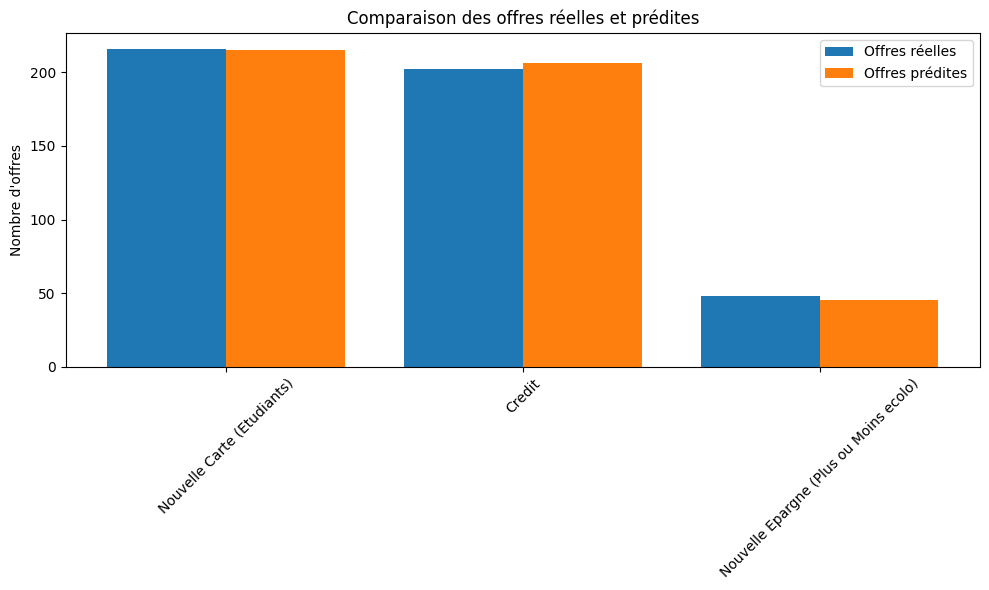

In [66]:
# Compter les valeurs réelles et prédites
real_offer_counts = resultats['Offre réelle'].value_counts()
predicted_offer_counts = resultats['Offre prédite'].value_counts()

# Création du diagramme à barres comparatif
labels = real_offer_counts.index  # Les types d'offres
x = range(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))

# Barres pour les offres réelles
ax.bar(x, real_offer_counts, width=0.4, label='Offres réelles', align='center')

# Barres pour les offres prédites (décalées pour comparaison)
ax.bar([i + 0.4 for i in x], predicted_offer_counts, width=0.4, label='Offres prédites', align='center')

# Ajouter les labels
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(labels, rotation=45)
ax.set_ylabel('Nombre d\'offres')
ax.set_title('Comparaison des offres réelles et prédites')

# Ajouter une légende
ax.legend()

# Afficher le diagramme
plt.tight_layout()
plt.show()


In [1]:
!pip install flask
!pip install pyngrok
